## Árboles de decisión con Grid search y Validación Cruzada y regresión logística

Considerando la información de la base de datos `BreastCancer` que pertenece a la librería $\tt mlbench$ se os propone crear un <u>clasificador</u> enfocado a predecir si los tumores detectados a diferentes pacientes son malignos o no. Esta base de datos contiene mediciones de imágenes digitalizadas de tejido mamario que corresponden a un estudio clínico sobre el cáncer de mama en mujeres. Las variables numéricas incluyen el grosor del tumor, uniformidad de tamaño de célula, uniformidad de forma de célula, etc. La variable objetivo binaria es `Class`, que clasifica los tumores como benignos o malignos. Se os pide lo siguiente:


1. Cargar el dataset `BreastCancer`, eliminar la $1º$ columna y realizar una presentación de la base de datos que vais a analizar. Luego, dividir el conjunto de datos en dos partes: $70\%$ para entrenamiento y $30\%$ para test. Verificar en ambos casos si las clases están balanceadas tanto en el conjunto de entrenamiento como en el de test, mostrando la cantidad de instancias por clase en ambos conjuntos. ¿Por qué dividimos el conjunto de datos en dos subconjuntos de train y test? Justificar la respuesta.


2. Entrenar un modelo de regresión logística utilizando la técnica de validación cruzada $k$-fold con `k=20`. Explicar el procedimiento e interpretar los resultados obtenidos de las salidas del modelo.


3. Evaluar en el conjunto de prueba el modelo de regresión logística entrenado utilizando las métricas adecuadas. Enumerarlas y describirlas con vuestras propias palabras. ¿Para qué sirven cada una de ellas? Justificar los resultados obtenidos.


4. Entrenar un modelo de árbol de decisión sin aplicar la técnica de grid search utilizando la técnica de validación cruzada $k$-fold con `k=20`. Explicar el procedimiento e interpretar los resultados obtenidos de las salidas del modelo.


5. Evaluar el modelo de árbol de decisión entrenado y <u>comparar</u> en el conjunto de prueba ambos modelos entrenados utilizando las métricas adecuadas como la precisión, el AUC-ROC, etc. Justificar los resultados obtenidos.

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 02</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [ ]:
install.packages("mlbench")

# Cargar librerías necesarias
library(mlbench)
library(dplyr)

# Cargar el dataset BreastCancer
data(BreastCancer)

# Eliminar la primera columna (Id)
data_bc <- BreastCancer[, -1]

# Presentación básica del dataset
cat("Dimensiones del dataset:\n")
print(dim(data_bc))

cat("\nEstructura del dataset:\n")
str(data_bc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Dimensiones del dataset:
[1] 699  10

Estructura del dataset:
'data.frame':	699 obs. of  10 variables:
 $ Cl.thickness   : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 5 5 3 6 4 8 1 2 2 4 ...
 $ Cell.size      : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 4 1 8 1 10 1 1 1 2 ...
 $ Cell.shape     : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 4 1 8 1 10 1 2 1 1 ...
 $ Marg.adhesion  : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 5 1 1 3 8 1 1 1 1 ...
 $ Epith.c.size   : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 2 7 2 3 2 7 2 2 2 2 ...
 $ Bare.nuclei    : Factor w/ 10 levels "1","2","3","4",..: 1 10 2 4 1 10 10 1 1 1 ...
 $ Bl.cromatin    : Factor w/ 10 levels "1","2","3","4",..: 3 3 3 3 3 9 3 3 1 2 ...
 $ Normal.nucleoli: Factor w/ 10 levels "1","2","3","4",..: 1 2 1 7 1 7 1 1 1 1 ...
 $ Mitoses        : Factor w/ 9 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 5 1 ...
 $ Class          : Factor w/ 2 levels "benign","malignant": 1 1 1 1 1 2 1 1 1 1 ...


In [ ]:
# Comprobamos si existen datos NAs para en caso afirmativo, eliminarlos y que no nos den problemas
wdata=na.omit(data_bc)
# Podemos comprobar como NO existen datos missing
nrow(data_bc) # Base de datos inicial
nrow(wdata) # Base de datos tras el na.omit

[1] 699

[1] 683

In [ ]:
head(wdata)

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
,<ord>,<ord>,<ord>,<ord>,<ord>,<fct>,<fct>,<fct>,<fct>,<fct>
1,5,1,1,1,2,1,3,1,1,benign
2,5,4,4,5,7,10,3,2,1,benign
3,3,1,1,1,2,2,3,1,1,benign
4,6,8,8,1,3,4,3,7,1,benign
5,4,1,1,3,2,1,3,1,1,benign
6,8,10,10,8,7,10,9,7,1,malignant


Como se puede observar si que hay datos faltantes en total hay 16 datos como es inferior al 10% de los datos se omitiran y se continuará con wdata


pasamo las variables a numerico ya que estan en discreto

In [ ]:
# Convertir predictores a numéricos
wdata[, -ncol(wdata)] <- lapply(
  wdata[, -ncol(wdata)],
  function(x) as.numeric(as.character(x))
)
# Realizamos el análisis exploratorio de las variables utilizadas
summary(wdata)

  Cl.thickness      Cell.size        Cell.shape     Marg.adhesion  
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.00  
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 1.00  
 Median : 4.000   Median : 1.000   Median : 1.000   Median : 1.00  
 Mean   : 4.442   Mean   : 3.151   Mean   : 3.215   Mean   : 2.83  
 3rd Qu.: 6.000   3rd Qu.: 5.000   3rd Qu.: 5.000   3rd Qu.: 4.00  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.00  
  Epith.c.size     Bare.nuclei      Bl.cromatin     Normal.nucleoli
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.00  
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 1.00  
 Median : 2.000   Median : 1.000   Median : 3.000   Median : 1.00  
 Mean   : 3.234   Mean   : 3.545   Mean   : 3.445   Mean   : 2.87  
 3rd Qu.: 4.000   3rd Qu.: 6.000   3rd Qu.: 5.000   3rd Qu.: 4.00  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.00  
    Mitoses             Class    
 Min.   : 1.00

In [ ]:
numeric_vars <- wdata[, sapply(wdata, is.numeric)]
# Cargar librería necesaria para kurtosis
if(!require(moments, quietly = TRUE)){
  install.packages("moments", repos = "https://cloud.r-project.org")
  library(moments)
}

# Desviación estándar de todas las variables numéricas
sapply(numeric_vars, sd, na.rm = TRUE)

Cl.thickness       Cell.size      Cell.shape   Marg.adhesion    Epith.c.size 
       2.820761        3.065145        2.988581        2.864562        2.223085 
    Bare.nuclei     Bl.cromatin Normal.nucleoli         Mitoses 
       3.643857        2.449697        3.052666        1.732674

In [ ]:
# Curtosis de todas las variables numéricas
sapply(numeric_vars, kurtosis, na.rm = TRUE)

Cl.thickness       Cell.size      Cell.shape   Marg.adhesion    Epith.c.size 
       2.362729        3.064369        2.974535        3.926750        5.105309 
    Bare.nuclei     Bl.cromatin Normal.nucleoli         Mitoses 
       2.198220        3.157649        3.461356       15.174937

**<u>Interpretación resultados</u>.-**

La base de datos **BreastCancer** analizada consta de **683 observaciones válidas** tras la eliminación de valores perdidos, y **10 variables**, de las cuales **9 son predictoras ordinales** con valores entre 1 y 10 y una variable respuesta binaria (**Class**), que clasifica los tumores como **benignos (444 casos)** o **malignos (239 casos)**. Aunque existe un cierto **desbalance de clases**, este no es extremo, por lo que el conjunto resulta adecuado para el desarrollo de modelos de clasificación supervisada.

Las variables explicativas corresponden a **mediciones clínicas ordinales** relacionadas con características celulares observadas en imágenes digitalizadas de tejido mamario. Todas ellas presentan rangos completos entre 1 y 10, lo que indica una adecuada cobertura de la escala de valoración clínica.

Desde el punto de vista descriptivo, se observa que variables como **Cl.thickness**, **Cell.size**, **Cell.shape**, **Bare.nuclei** y **Bl.cromatin** presentan **medias claramente superiores a 3**, así como **desviaciones estándar elevadas** (en torno a 2.5–3.6), lo que indica una **alta variabilidad interpaciente** y sugiere un potencial poder discriminante entre tumores benignos y malignos. En particular, **Bare.nuclei** muestra una de las desviaciones estándar más altas (≈ 3.64), reflejando una fuerte heterogeneidad en la estructura celular.

Por el contrario, variables como **Mitoses** presentan una **media baja (≈ 1.60)** y una **mediana igual a 1**, lo que indica que la mayoría de las observaciones se concentran en valores pequeños, con pocos casos extremos. Esta característica se confirma mediante una **curtosis muy elevada (≈ 15.17)**, que revela una distribución altamente leptocúrtica con colas pesadas, asociada a la presencia de pocos tumores con actividad mitótica muy alta.

En general, la mayoría de las variables presentan **curtosis superior a 3**, lo que indica distribuciones más concentradas alrededor de la media y la presencia de valores extremos, especialmente en variables relacionadas con la morfología celular y nuclear. Este comportamiento es consistente con el contexto clínico del problema, donde los tumores malignos suelen presentar valores notablemente más altos en estas escalas ordinales.

La variable **Class** actúa como **variable objetivo binaria**, lo que convierte a este conjunto de datos en un escenario clásico para el estudio y comparación de **modelos de clasificación**, tales como árboles de decisión, KNN, SVM o regresión logística. La combinación de variables ordinales con alta variabilidad y una respuesta clínica bien definida sugiere que la base de datos contiene **información relevante y suficiente para discriminar entre tumores benignos y malignos** de forma efectiva.


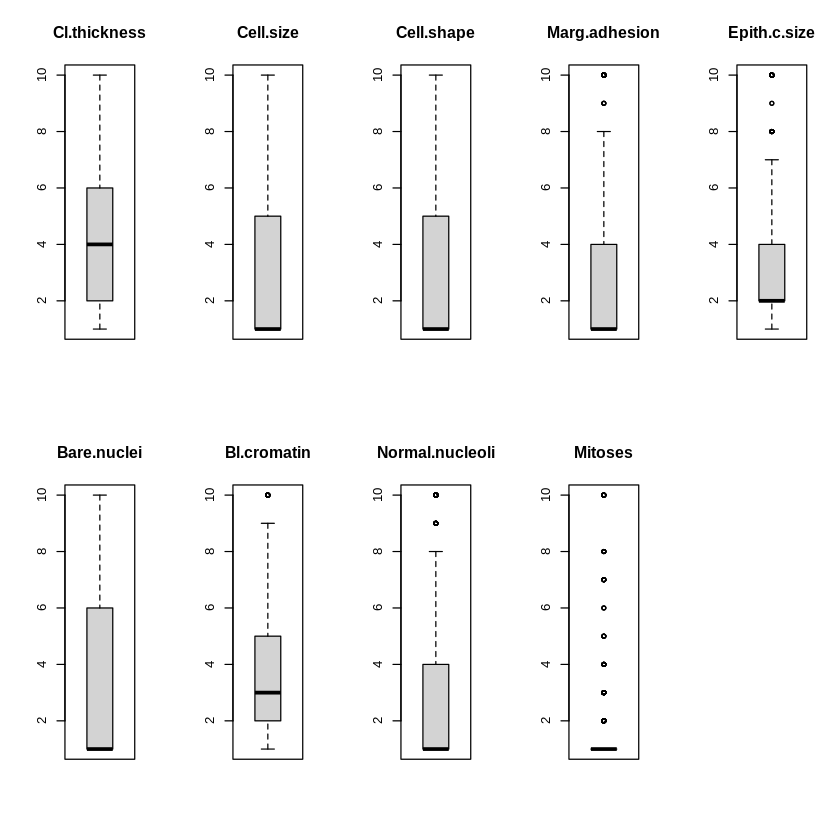

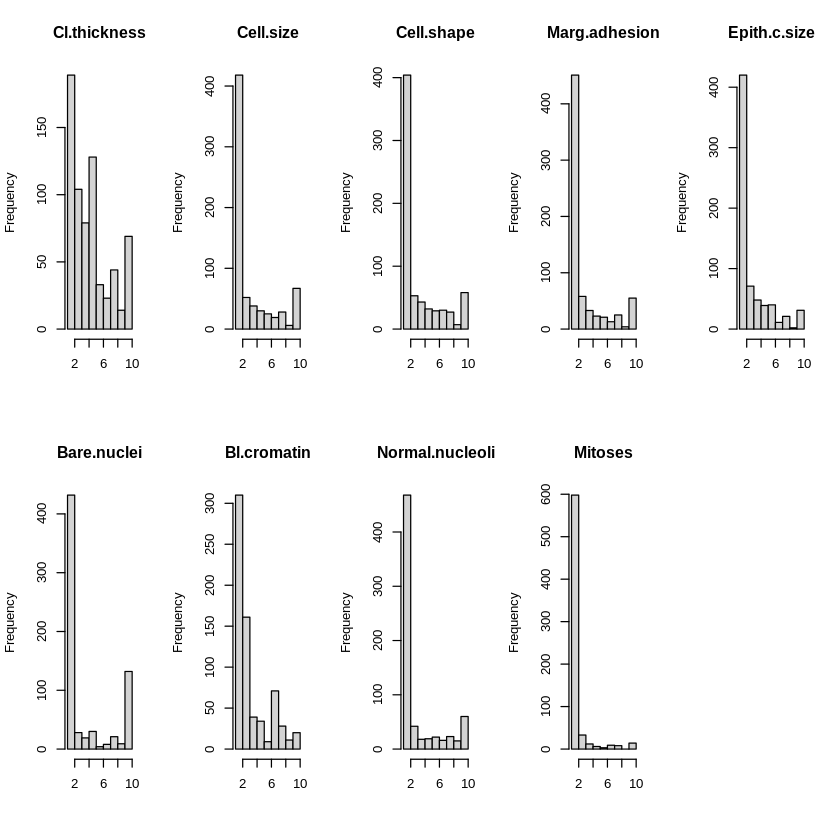

In [ ]:
# Seleccionar solo las variables numéricas
numeric_vars <- wdata[, sapply(wdata, is.numeric)]

# ---------- BOXPLOTS AUTOMÁTICOS ----------
par(mfrow = c(2, ceiling(ncol(numeric_vars)/2)))
for(i in 1:ncol(numeric_vars)){
  boxplot(numeric_vars[, i], main = colnames(numeric_vars)[i])
}

# ---------- HISTOGRAMAS AUTOMÁTICOS ----------
par(mfrow = c(2, ceiling(ncol(numeric_vars)/2)))
for(i in 1:ncol(numeric_vars)){
  hist(numeric_vars[, i], main = colnames(numeric_vars)[i], xlab = "")
}

# Volver a la configuración normal
par(mfrow = c(1,1))


**<u>Interpretación resultados</u>.–**

Los **boxplots** y **histogramas** permiten analizar de forma conjunta la **distribución**, **dispersión**, **asimetría** y la **presencia de valores extremos** de las variables morfológicas incluidas en la base de datos **BreastCancer**. Estas variables representan mediciones ordinales (en escala 1–10) extraídas de imágenes digitalizadas de tejido mamario y son clave para la clasificación de tumores **benignos** y **malignos**.

**Dispersión y valores atípicos (boxplots)**

A partir de los **boxplots**, se observan patrones claros:

- **Cl.thickness** presenta una dispersión moderada, con valores centrales relativamente bien definidos, aunque con algunos valores altos que podrían asociarse a tumores malignos.
- **Cell.size** y **Cell.shape** muestran una **alta variabilidad** y numerosos valores extremos superiores, lo que indica una fuerte heterogeneidad celular en determinados casos, característica típica de tumores malignos.
- **Marg.adhesion** y **Epith.c.size** presentan asimetría positiva y colas largas hacia valores altos, reflejando que la mayoría de los tumores benignos se concentran en valores bajos, mientras que los malignos tienden a valores más elevados.
- **Bare.nuclei**, **Bl.cromatin** y **Normal.nucleoli** destacan por su **gran dispersión** y abundancia de outliers, lo que sugiere un alto poder discriminante, ya que estos rasgos nucleares suelen diferir notablemente entre tumores benignos y malignos.
- **Mitoses** muestra una distribución muy concentrada en valores bajos, con pocos casos extremos altos, coherentes con situaciones de alta actividad mitótica asociadas a malignidad.

**Forma de las distribuciones (histogramas)**

Los **histogramas** refuerzan las conclusiones anteriores:

- La mayoría de las variables presentan **asimetría positiva**, con una gran concentración de observaciones en valores bajos (1–3) y colas largas hacia valores altos.
- Variables como **Cell.size**, **Cell.shape** y **Bare.nuclei** muestran distribuciones claramente sesgadas y con acumulación en valores extremos, lo que indica una separación potencial entre clases.
- **Mitoses** presenta una distribución altamente concentrada en el valor mínimo, con una cola muy pronunciada, lo que explica su elevada curtosis y su comportamiento extremo en comparación con el resto de variables.

 **Conclusión**

En conjunto, el análisis gráfico pone de manifiesto que las variables relacionadas con la **morfología celular y nuclear** —especialmente **Cell.size**, **Cell.shape**, **Bare.nuclei**, **Bl.cromatin** y **Normal.nucleoli**— presentan **mayor variabilidad, asimetría y presencia de valores extremos**, lo que las convierte en **fuertes candidatas para discriminar entre tumores benignos y malignos**.  

Por el contrario, variables como **Cl.thickness** o **Mitoses**, aunque informativas, muestran una mayor concentración de valores bajos y una capacidad discriminante más limitada de forma individual. Este comportamiento justifica el uso de **modelos de clasificación multivariantes**, como árboles de decisión o métodos de ensamblado, que puedan combinar la información conjunta de todas estas características para mejorar la precisión diagnóstica.


Dividimos el conjunto de datos en entrenamiento (train) y prueba (test) para poder evaluar de forma objetiva la capacidad de generalización del modelo, es decir, su rendimiento sobre datos no vistos durante el entrenamiento.

En concreto:

1. Evitar el sobreajuste (overfitting)
Si el modelo se evalúa sobre los mismos datos con los que se ha ajustado, puede aprender patrones específicos del conjunto de datos (incluido el ruido) y mostrar un rendimiento artificialmente alto. Separar un conjunto de test permite comprobar si el modelo mantiene su capacidad predictiva fuera de la muestra de entrenamiento.

2. Simular el uso real del modelo
En un escenario real, el modelo se aplica a observaciones nuevas. El conjunto de test actúa como una aproximación a este escenario, proporcionando una estimación realista del desempeño esperado en producción.

3. Evaluación imparcial del modelo
El conjunto de test no debe intervenir en ninguna fase del entrenamiento ni de selección de hiperparámetros. De este modo, las métricas calculadas (precisión, AUC-ROC, sensibilidad, especificidad, etc.) son imparciales y comparables entre modelos distintos.

4. Separar ajuste y evaluación
Técnicas como bootstrap o validación cruzada k-fold se aplican exclusivamente sobre el conjunto de entrenamiento para estimar la estabilidad del modelo y optimizarlo. El conjunto de test queda reservado como una evaluación final independiente.

En resumen, la división train–test es esencial para garantizar que las conclusiones extraídas sobre el rendimiento del modelo sean válidas, robustas y extrapolables, y no el resultado de un ajuste excesivo a los datos disponibles.

In [ ]:
install.packages("caret")
library(caret)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice



In [ ]:
# Para reproducibilidad
set.seed(143)

# Dividimos los datos en un conjunto de entrenamiento y otro de prueba para poder evaluar el modelo
index = caret::createDataPartition(wdata$Class , p = 0.7, list = FALSE)

In [ ]:
# Definimos los conjuntos de entrenamiento y test
train_set = wdata[index, ]
test_set  = wdata[-index, ]

In [ ]:
# Mostramos el conjunto de entrenamiento
head(train_set); nrow(train_set)

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5,1,1,1,2,1,3,1,1,benign
2,5,4,4,5,7,10,3,2,1,benign
3,3,1,1,1,2,2,3,1,1,benign
4,6,8,8,1,3,4,3,7,1,benign
5,4,1,1,3,2,1,3,1,1,benign
6,8,10,10,8,7,10,9,7,1,malignant


[1] 479

In [ ]:
# Mostramos el conjunto de test
head(test_set); nrow(test_set)

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
11,1,1,1,1,1,1,3,1,1,benign
13,5,3,3,3,2,3,4,4,1,malignant
23,3,1,1,1,2,1,2,1,1,benign
27,3,2,1,1,1,1,2,1,1,benign
35,3,1,2,1,2,1,2,1,1,benign
36,2,1,1,1,2,1,2,1,1,benign


[1] 204

In [ ]:
# Identificamos cuántas observaciones tenemos en cada grupo de pasajeros en el conjunto de train
# Grupo 0: no sobrevivieron; Grupo 1: sobrevivieron
table(train_set$Class ) |> prop.table()


   benign malignant 
0.6492693 0.3507307 

In [ ]:
# Identificamos cuántas observaciones tenemos en cada grupo de pasajeros en el conjunto de test
table(train_set$Class ) |> prop.table()


   benign malignant 
0.6492693 0.3507307 

**Interpretación resultados.-** Como se observan estan perfectamente equilibradas ambos poseen la misma proporcion tanto en test como en train.

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

**<u>Procedimiento de la validación cruzada k-fold (k = 20)</u>.–**

La **validación cruzada k-fold** es una técnica de evaluación que permite estimar el **rendimiento de generalización** de un modelo utilizando de forma eficiente todo el conjunto de datos de entrenamiento. A continuación se describe paso a paso el procedimiento para el caso **k = 20**, aplicado al entrenamiento de un modelo de **regresión logística**.

**Paso 1. Definición del conjunto de entrenamiento**  
Se parte del conjunto de datos de entrenamiento, previamente separado del conjunto de test. Este conjunto contiene observaciones etiquetadas en dos clases (*setosa* y *versicolor*), y será el único utilizado durante el proceso de validación cruzada.

**Paso 2. Partición del conjunto en k subconjuntos**  
El conjunto de entrenamiento se divide en **k = 20 subconjuntos disjuntos** (denominados *folds*), aproximadamente del mismo tamaño.  
En un esquema estratificado (habitual en clasificación), cada fold mantiene **proporciones similares de ambas clases**, evitando sesgos debidos al desbalanceo.

**Paso 3. Iteraciones de entrenamiento–validación**  
El procedimiento se repite **20 veces**, una por cada fold:
- En cada iteración, **19 folds** se utilizan como conjunto de entrenamiento.
- El **fold restante** se utiliza como conjunto de validación.

De este modo, cada observación del conjunto de entrenamiento:
- Se usa **una vez para validar** el modelo.
- Se usa **nueve veces para entrenarlo**.

**Paso 4. Ajuste del modelo en cada iteración**  
En cada iteración:
- Se ajusta un **modelo de regresión logística** sobre los 19 folds de entrenamiento.
- Se generan predicciones sobre el fold de validación.
- Se calculan métricas de rendimiento (por ejemplo, accuracy, sensibilidad, especificidad o AUC).

Esto produce **10 estimaciones del rendimiento**, una por cada fold.

**Paso 5. Agregación de resultados**  
Una vez completadas las 20 iteraciones:
- Las métricas obtenidas se **promedian** para obtener una estimación global del rendimiento del modelo.
- También puede calcularse la **variabilidad entre folds**, lo que proporciona información sobre la estabilidad del modelo.

**Paso 6. Selección del modelo final**  
El rendimiento medio obtenido mediante validación cruzada se utiliza para:
- Evaluar la calidad del modelo.
- Comparar distintos modelos o configuraciones (por ejemplo, selección de variables o hiperparámetros).

Tras este proceso, el modelo final se ajusta utilizando **todo el conjunto de entrenamiento**.

**Conclusión**  
La validación cruzada k-fold con \( k = 20 \) ofrece un equilibrio adecuado entre **sesgo y varianza** en la estimación del error, proporcionando una evaluación fiable del modelo sin desperdiciar datos. Es una técnica especialmente adecuada cuando el tamaño muestral es limitado y se desea una estimación robusta del rendimiento antes de evaluar el modelo en el conjunto de test.


En este caso se realizará un **modelo de regresión logística**, cuyo objetivo es estimar la **probabilidad de ocurrencia de un evento binario**, en función de una o más variables explicativas cuantitativas o cualitativas.

A diferencia de la regresión polinómica, que modela directamente el valor esperado de la variable dependiente, la regresión logística modela la **probabilidad de éxito** (en este caso sería que el recién nacido tenga bajo peso al nacer) a través de una **función logística**.

La ecuación general del modelo logístico es:

$$
P(Y = 1 \mid X) = \pi(X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p)}}
$$

donde:

- $P(Y = 1 \mid X)$ o $\pi(X)$: es la **probabilidad estimada** de que ocurra el evento de interés (bajo peso al nacer).  
- $\beta_0$: es el intercepto o término constante del modelo.  
- $\beta_1, \beta_2, \ldots, \beta_p$: son los **coeficientes logísticos**, que representan el cambio en el **logaritmo del cociente de probabilidades (log-odds)** asociado a un incremento unitario en la variable explicativa.  
- $X_1, X_2, \ldots, X_p$: son las variables independientes o explicativas.  

Como solo se considera una sola variable predictora `lwt, el modelo se denomina **modelo de regresión logística simple (MRLS)**, y su ecuación se reduce a:

$$
P(Y = 1 \mid X) = \pi(X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 lwt)}}
$$

In [ ]:
# Control de validación cruzada k-fold (k = 20)
ctrl_cv <- trainControl(
  method = "cv",
  number = 20,
  classProbs = TRUE,
  summaryFunction = twoClassSummary
)

In [ ]:
# Entrenamiento del modelo de regresión logística
modelo_logit <- train(
  Class ~ .,
  data = train_set,
  method = "glm",
  family = binomial,
  trControl = ctrl_cv,
  metric = "ROC"
)

In [ ]:
# Visualizamos un resumen del proceso de entrenamiento
print(modelo_logit)

Generalized Linear Model 

479 samples
  9 predictor
  2 classes: 'benign', 'malignant' 

No pre-processing
Resampling: Cross-Validated (20 fold) 
Summary of sample sizes: 455, 456, 456, 456, 455, 456, ... 
Resampling results:

  ROC        Sens       Spec     
  0.9960938  0.9714583  0.9527778



**<u>Interpretación de resultados</u>.-**

El **Output** corresponde al entrenamiento de un **modelo de regresión logística (Generalized Linear Model con familia binomial)** aplicado al conjunto de datos **BreastCancer**, compuesto por **479 observaciones**, **9 variables predictoras** y una **variable respuesta binaria** con dos clases: *benign* y *malignant*.

El modelo se ha evaluado mediante **validación cruzada k-fold con k = 20**, lo que implica que el conjunto de datos se divide en 20 subconjuntos y, en cada iteración, se utilizan 19 folds para entrenar el modelo y 1 fold para validarlo. Este procedimiento proporciona una estimación **robusta y estable** del rendimiento del clasificador, reduciendo la dependencia de una única partición de los datos.

Los resultados obtenidos en validación cruzada son los siguientes:
- **ROC = 0.9961**, lo que indica una **capacidad discriminante excelente**, muy cercana al clasificador perfecto.
- **Sensibilidad = 0.9715**, lo que implica que el modelo identifica correctamente el **97.15% de los tumores malignos**, minimizando el número de falsos negativos.
- **Especificidad = 0.9528**, lo que indica que el **95.28% de los tumores benignos** son clasificados correctamente, con una baja tasa de falsos positivos.

La ausencia de preprocesamiento sugiere que el modelo se ha entrenado directamente sobre las variables originales, y aun así presenta un rendimiento sobresaliente, lo que refleja una **alta capacidad explicativa de los predictores morfológicos** para discriminar entre tumores benignos y malignos.

En conjunto, estos resultados muestran que la **regresión logística** es un modelo altamente adecuado para este problema de clasificación binaria, proporcionando predicciones fiables y una excelente separación entre clases. No obstante, para confirmar su capacidad de generalización, es recomendable evaluar el modelo final sobre un **conjunto de test independiente**.


In [ ]:
# Información de salida del modelo de regresión logístico estimado (30 elementos diferentes caso lineal/no-lineal)
str(modelo_logit)

List of 24
 $ method      : chr "glm"
 $ modelInfo   :List of 15
  ..$ label     : chr "Generalized Linear Model"
  ..$ library   : NULL
  ..$ loop      : NULL
  ..$ type      : chr [1:2] "Regression" "Classification"
  ..$ parameters:'data.frame':	1 obs. of  3 variables:
  .. ..$ parameter: chr "parameter"
  .. ..$ class    : chr "character"
  .. ..$ label    : chr "parameter"
  ..$ grid      :function (x, y, len = NULL, search = "grid")  
  ..$ fit       :function (x, y, wts, param, lev, last, classProbs, ...)  
  ..$ predict   :function (modelFit, newdata, submodels = NULL)  
  ..$ prob      :function (modelFit, newdata, submodels = NULL)  
  ..$ varImp    :function (object, ...)  
  ..$ predictors:function (x, ...)  
  ..$ levels    :function (x)  
  ..$ trim      :function (x)  
  ..$ tags      : chr [1:4] "Generalized Linear Model" "Linear Classifier" "Two Class Only" "Accepts Case Weights"
  ..$ sort      :function (x)  
 $ modelType   : chr "Classification"
 $ results     :'dat

**<u>Estructura del `str(glm)`</u>.-**

Al aplicar la función `str()` a un modelo ajustado mediante `glm()` (en este caso, un modelo de **regresión logística binomial**) se observa entre los elementos más relevantes del objeto:

- **coefficients**: contiene los coeficientes estimados del modelo, incluyendo el intercepto y el parámetro asociado a la variable explicativa (`lwt`).  

- **residuals**: muestra los residuos del modelo, es decir, la diferencia entre los valores observados y los valores ajustados (en escala del predictor lineal).  

- **fitted.values**: valores ajustados o predichos, que representan la probabilidad estimada de que ocurra el evento de interés (en este caso, `low = 1`).  

- **effects**: cantidades empleadas en el proceso iterativo de estimación (método de máxima verosimilitud).  

- **family**: lista con la información sobre la familia de distribución (binomial en este caso) y el tipo de enlace (logit).  

- **linear.predictors**: valores del predictor lineal $\eta_i = \beta_0 + \beta_1 X_i$, antes de aplicar la transformación logística.  

- **deviance**: medida del ajuste del modelo; valores más bajos indican mejor ajuste respecto al modelo nulo.  

- **aic**: criterio de información de Akaike, útil para comparar modelos alternativos.  

- **null.deviance / residual.deviance**: indican la variación total sin el modelo y la variación residual después de ajustar el modelo, respectivamente.  

- **converged**: indica si el proceso iterativo de estimación (máxima verosimilitud) ha convergido correctamente.  

- **df.null / df.residual**: grados de libertad asociados al modelo nulo y al modelo ajustado.  

- **model**: data frame con las variables efectivamente utilizadas en la estimación (en este caso, `low` y `lwt`).  

- **terms, call, formula**: elementos que almacenan la fórmula del modelo, la llamada original a `glm()` y la estructura de los términos utilizados.  

En conjunto, esta estructura permite acceder a toda la información necesaria para interpretar, diagnosticar y validar el modelo logístico, tanto desde un punto de vista estadístico como computacional.


<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

**La matriz de confusión**
 La **matriz de confusión** evalua el rendimiento de un modelo de clasificación, ya que compara las **predicciones del modelo** con las **clases reales**. En el caso de un problema binario, la matriz se organiza en torno a dos clases: setosa y versicolor.

- **Verdaderos Negativos (TN)**: corresponden a las observaciones que **realmente pertenecen a la clase 0** y que el modelo **clasifica correctamente como 0**.

- **Falsos Positivos (FP)**: son las observaciones que **realmente pertenecen a la clase 0**, pero que el modelo **clasifica incorrectamente como 1**.

- **Falsos Negativos (FN)**: son las observaciones que **realmente pertenecen a la clase 1**, pero que el modelo **clasifica incorrectamente como 0**.

- **Verdaderos Positivos (TP)**: corresponden a las observaciones que **realmente pertenecen a la clase 1** y que el modelo **clasifica correctamente como 1**.

**Accuracy (Precisión global)**  
La *Accuracy* mide la **proporción total de observaciones correctamente clasificadas** por el modelo. Se calcula como el número de predicciones correctas dividido entre el número total de observaciones. Es una medida global del rendimiento del clasificador y resulta especialmente informativa cuando las clases están **balanceadas**, como ocurre en este conjunto de datos. Sin embargo, puede ser engañosa en problemas con fuerte desbalanceo de clases, ya que un modelo podría obtener una alta accuracy simplemente prediciendo siempre la clase mayoritaria.

**Sensibilidad (Recall o True Positive Rate)**  
La *Sensibilidad* cuantifica la **capacidad del modelo para identificar correctamente los individuos de la clase positiva**. Se define como la proporción de verdaderos positivos sobre el total de observaciones que realmente pertenecen a la clase positiva. Esta métrica es clave cuando el objetivo principal es **detectar correctamente una clase concreta**, minimizando los falsos negativos, por ejemplo en problemas médicos o de detección de fraude.

**Especificidad (True Negative Rate)**  
La *Especificidad* mide la **capacidad del modelo para identificar correctamente los individuos de la clase negativa**. Se calcula como la proporción de verdaderos negativos sobre el total de observaciones que realmente pertenecen a la clase negativa. Es especialmente relevante cuando se desea **evitar falsos positivos**, es decir, cuando clasificar erróneamente un individuo como positivo tiene un coste elevado.

**AUC de la curva ROC**  
El *AUC* (Area Under the Curve) de la **curva ROC** resume en un único valor la **capacidad discriminante del modelo** para distinguir entre las dos clases, considerando todos los posibles umbrales de decisión. Un valor de AUC cercano a 0.5 indica un clasificador sin capacidad discriminante (equivalente al azar), mientras que un valor cercano a 1 indica una separación casi perfecta entre clases. A diferencia de la accuracy, el AUC es **robusto frente al desbalanceo de clases** y proporciona una visión más completa del rendimiento del modelo.


Confusion Matrix and Statistics

           Reference
Prediction  benign malignant
  benign       131         4
  malignant      2        67
                                          
               Accuracy : 0.9706          
                 95% CI : (0.9371, 0.9891)
    No Information Rate : 0.652           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9348          
                                          
 Mcnemar's Test P-Value : 0.6831          
                                          
            Sensitivity : 0.9850          
            Specificity : 0.9437          
         Pos Pred Value : 0.9704          
         Neg Pred Value : 0.9710          
             Prevalence : 0.6520          
         Detection Rate : 0.6422          
   Detection Prevalence : 0.6618          
      Balanced Accuracy : 0.9643          
                                          
       'Positive' Class : benign          

Accuracy 
0.9705882

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting direction: controls < cases



Area under the curve: 0.9956

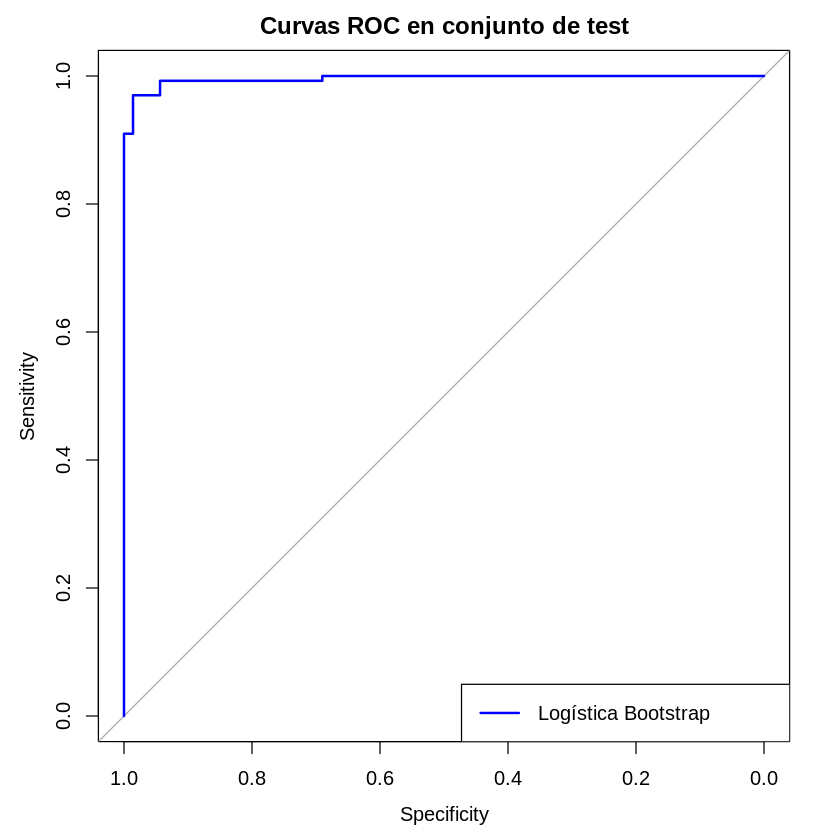

In [ ]:


# Predicciones de clase
pred_boot <- predict(modelo_logit, newdata = test_set)


# Predicciones de probabilidad (necesarias para ROC y AUC)
prob_boot <- predict(modelo_logit, newdata = test_set, type = "prob")



# MATRICES DE CONFUSIÓN

cm_boot <- caret::confusionMatrix(pred_boot, test_set$Class, positive = "benign")


cm_boot



# MÉTRICAS PRINCIPALES

accuracy_boot <- cm_boot$overall["Accuracy"]


accuracy_boot;


# CURVA ROC Y AUC

library(pROC)

roc_boot <- pROC::roc(
  response  = test_set$Class,
  predictor = prob_boot[, "benign"],
  levels    = c("malignant", "benign")
)




auc_boot <- auc(roc_boot)

auc_boot


#  Comparación gráfica
plot(roc_boot, col = "blue", main = "Curvas ROC en conjunto de test")
legend("bottomright",
       legend = c("Logística Bootstrap"),
       col = c("blue"), lwd = 2)


**<u>Interpretación de resultados</u>.-**

La **matriz de confusión** obtenida en el conjunto de test permite evaluar de forma detallada el rendimiento del **modelo de regresión logística** aplicado al dataset *BreastCancer*, considerando como **clase positiva** el tumor **benigno** y como **clase negativa** el **maligno**.

La matriz presenta la siguiente distribución:

- **Verdaderos Positivos (TP = 131)**: tumores benignos correctamente clasificados como benignos.
- **Falsos Positivos (FP = 4)**: tumores malignos clasificados erróneamente como benignos.
- **Falsos Negativos (FN = 2)**: tumores benignos clasificados erróneamente como malignos.
- **Verdaderos Negativos (TN = 67)**: tumores malignos correctamente clasificados como malignos.

A partir de esta matriz se obtienen las siguientes métricas:

- **Accuracy = 0.9706**: el modelo clasifica correctamente aproximadamente el **97.1 %** de las observaciones del conjunto de test, lo que indica un rendimiento global muy elevado.
- **Kappa = 0.9348**: existe un **acuerdo casi perfecto** entre las predicciones del modelo y las clases reales, incluso tras corregir por el acuerdo esperado por azar.
- **Sensibilidad = 0.9850**: el modelo identifica correctamente el **98.5 % de los tumores benignos**, minimizando los falsos negativos cuando la clase positiva es benigna.
- **Especificidad = 0.9437**: el **94.4 % de los tumores malignos** son correctamente detectados como tales, lo que refleja una buena capacidad para evitar falsos positivos.
- **Balanced Accuracy = 0.9643**: confirma que el rendimiento del modelo es **alto y equilibrado** entre ambas clases, incluso considerando posibles desbalances.

El **AUC de la curva ROC** es **0.9956**, un valor extremadamente cercano a 1, lo que indica una **capacidad discriminante excelente**. Esto significa que, para casi cualquier umbral de decisión, el modelo es capaz de separar de forma muy efectiva tumores benignos y malignos a partir de las variables explicativas.

En conjunto, estos resultados muestran que el **modelo de regresión logística entrenado con validación cruzada k-fold (k = 20)** presenta un **desempeño sobresaliente en el conjunto de test**, con muy pocos errores de clasificación y una separación casi perfecta entr


<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

**<u>Árbol de decisión: fundamentos y procedimiento</u>.-**

Un **árbol de decisión** es un modelo de **clasificación supervisada** que predice la clase de una observación mediante una secuencia de **reglas de decisión jerárquicas**, construidas a partir de las variables explicativas. El resultado final es una estructura en forma de árbol compuesta por **nodos**, **ramas** y **hojas**.



### **Estructura básica del árbol**

- **Nodo raíz**: primer punto de partición del espacio muestral, donde se selecciona la variable que mejor separa las clases.
- **Nodos internos**: representan decisiones intermedias basadas en una variable y un punto de corte.
- **Hojas**: nodos terminales que asignan una **clase final** (o una probabilidad de pertenencia a cada clase).

Cada camino desde la raíz hasta una hoja define una **regla de clasificación** del tipo:

*Si (condición 1) y (condición 2) y … entonces Clase = X*.


### **Criterios de partición**

En cada nodo, el algoritmo selecciona la variable y el punto de corte que maximizan la **pureza de las clases** resultantes. Los criterios más habituales son:

- **Índice Gini**:
$$
G = 1 - \sum_{k=1}^{K} p_k^2
$$

- **Entropía**:
$$
H = - \sum_{k=1}^{K} p_k \log(p_k)
$$

donde $p_k$ es la proporción de observaciones de la clase $k$ en el nodo.  
El objetivo es **minimizar la impureza** en los nodos hijos respecto al nodo padre.



### **Proceso de construcción**

1. **Inicio en el nodo raíz** con todas las observaciones.
2. **Evaluación de todas las posibles particiones** (variables y puntos de corte).
3. **Selección de la mejor partición** según el criterio de impureza.
4. **División del conjunto de datos** en nodos hijos.
5. **Repetición recursiva** del proceso hasta que se cumpla un criterio de parada:
   - profundidad máxima alcanzada,
   - número mínimo de observaciones por nodo,
   - nodo completamente puro.


### **Sobreajuste y poda**

Los árboles muy profundos tienden a **sobreajustar** los datos de entrenamiento. Para evitarlo se emplean dos estrategias principales:

- **Pre-poda**: limitar el crecimiento del árbol (profundidad máxima, tamaño mínimo de nodos, etc.).
- **Post-poda**: construir un árbol grande y posteriormente **eliminar ramas poco informativas**, habitualmente usando **validación cruzada** y un parámetro de complejidad.


### **Limitaciones**

- Alta **varianza**: pequeños cambios en los datos pueden generar árboles muy distintos.
- Tendencia al sobreajuste si no se controlan adecuadamente.
- Rendimiento predictivo inferior a modelos más complejos si se usan de forma aislada.





In [ ]:
# Configuramos el control de entrenamiento para usar validación cruzada de 20 pliegues, lo que ayuda a evitar
# el sobreajuste y proporciona una estimación más robusta del rendimiento del modelo
trainControl = caret::trainControl(method = "repeatedcv", number = 20, repeats = 10)

In [ ]:
# Entrenamos el modelo de árbol de decisión (CART) con rpart
modelo_dt <- caret::train(
  Class ~ Cl.thickness + Cell.size + Cell.shape + Marg.adhesion +
           Epith.c.size + Bare.nuclei + Bl.cromatin +
           Normal.nucleoli + Mitoses,
  data = train_set,
  method = "rpart",
  trControl = trainControl
)


In [ ]:
# Visualizamos un resumen del proceso de entrenamiento
print(modelo_dt)

CART 

479 samples
  9 predictor
  2 classes: 'benign', 'malignant' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 455, 455, 455, 455, 456, 455, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.02976190  0.9326207  0.8524063
  0.06547619  0.9131351  0.8112313
  0.80357143  0.7539522  0.3237071

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.0297619.


**<u>Interpretación de resultados</u>.–**

El **Output 2** corresponde al entrenamiento de un **modelo CART (Classification And Regression Tree)** aplicado al conjunto de datos **BreastCancer**, que contiene **479 observaciones**, **9 variables predictoras** y una **variable respuesta binaria** con dos clases: *benign* y *malignant*.

No se ha aplicado **preprocesado previo** sobre las variables, lo cual es adecuado en este caso, ya que los árboles de decisión pueden trabajar directamente con variables categóricas y ordinales sin necesidad de estandarización o normalización.

El modelo se ha evaluado mediante un esquema de **validación cruzada repetida**, concretamente **20-fold cross-validation repetida 10 veces**. Este procedimiento divide los datos en 20 subconjuntos, utilizando en cada iteración 19 folds para entrenamiento y 1 fold para validación, repitiendo todo el proceso 10 veces con distintas particiones. Esto proporciona una estimación **robusta y estable del rendimiento**, reduciendo la dependencia de una partición concreta de los datos.

El parámetro de complejidad **`cp`** controla el tamaño del árbol:
- Valores pequeños de `cp` permiten árboles más complejos, con mayor número de divisiones.
- Valores grandes de `cp` generan árboles más simples, con menor riesgo de sobreajuste pero menor capacidad explicativa.

Los resultados muestran que:
- Para **`cp = 0.0297619`**, el modelo alcanza una **Accuracy media de 0.9326** y un **Kappa de 0.8524**, lo que indica un rendimiento muy alto y una concordancia fuerte entre las predicciones y las clases reales.
- Para **`cp = 0.06547619`**, el rendimiento disminuye ligeramente, con una Accuracy de 0.9131.
- Para **`cp = 0.80357143`**, el rendimiento cae de forma notable, lo que refleja un modelo excesivamente simplificado que no captura adecuadamente la estructura de los datos.

Dado que la **Accuracy** ha sido el criterio de selección, el modelo final elegido es el correspondiente a **`cp = 0.0297619`**, al proporcionar el mejor compromiso entre capacidad predictiva y complejidad.

En conjunto, estos resultados indican que un **árbol de decisión de complejidad moderada** es capaz de clasificar con alta precisión los tumores como benignos o malignos a partir de las variables citológicas disponibles. No obstante, para evaluar correctamente su capacidad de generalización, resulta imprescindible analizar su desempeño final sobre el **conjunto de test**.


<div style="background-color:#5DADE2"><b>Apartado 5</b></div>

Confusion Matrix and Statistics

           Reference
Prediction  benign malignant
  benign       303         6
  malignant      8       162
                                          
               Accuracy : 0.9708          
                 95% CI : (0.9514, 0.9839)
    No Information Rate : 0.6493          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.936           
                                          
 Mcnemar's Test P-Value : 0.7893          
                                          
            Sensitivity : 0.9743          
            Specificity : 0.9643          
         Pos Pred Value : 0.9806          
         Neg Pred Value : 0.9529          
             Prevalence : 0.6493          
         Detection Rate : 0.6326          
   Detection Prevalence : 0.6451          
      Balanced Accuracy : 0.9693          
                                          
       'Positive' Class : benign          

Confusion Matrix and Statistics

           Reference
Prediction  benign malignant
  benign       294         5
  malignant     17       163
                                         
               Accuracy : 0.9541         
                 95% CI : (0.9313, 0.971)
    No Information Rate : 0.6493         
    P-Value [Acc > NIR] : < 2e-16        
                                         
                  Kappa : 0.9008         
                                         
 Mcnemar's Test P-Value : 0.01902        
                                         
            Sensitivity : 0.9453         
            Specificity : 0.9702         
         Pos Pred Value : 0.9833         
         Neg Pred Value : 0.9056         
             Prevalence : 0.6493         
         Detection Rate : 0.6138         
   Detection Prevalence : 0.6242         
      Balanced Accuracy : 0.9578         
                                         
       'Positive' Class : benign         
                   

Accuracy 
0.9707724

Kappa 
0.9360005

Accuracy 
0.954071

Kappa 
0.9007833

Setting direction: controls < cases

Setting direction: controls < cases



Area under the curve: 0.9962

Area under the curve: 0.9672

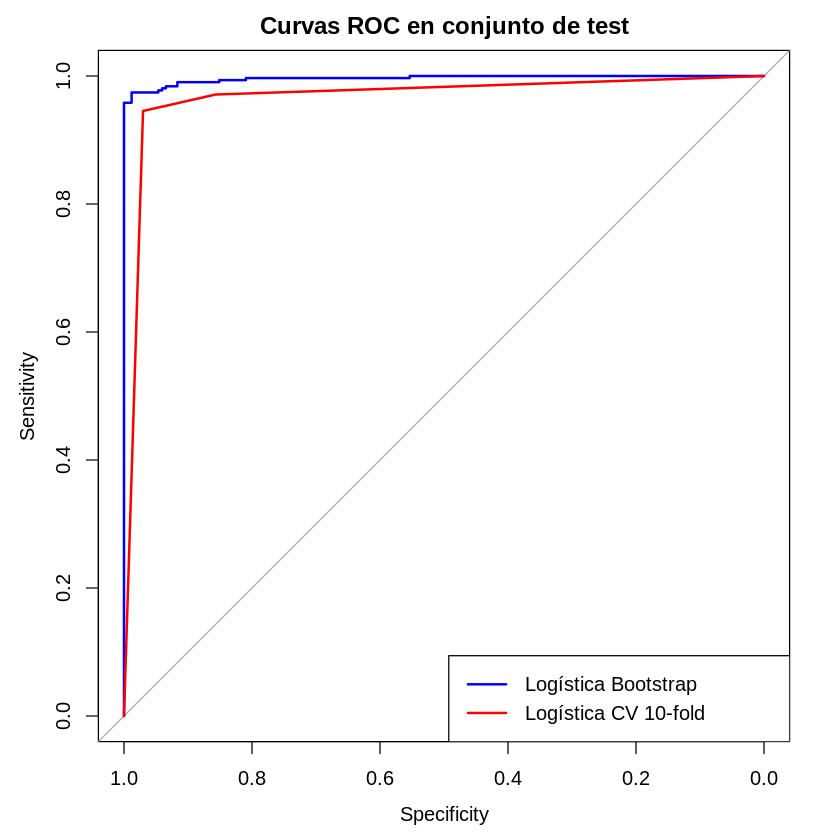

In [ ]:


# Predicciones de clase
pred_boot <- predict(modelo_logit, newdata = train_set)
pred_cv   <- predict(modelo_dt,   newdata = train_set)

# Predicciones de probabilidad (necesarias para ROC y AUC)
prob_boot <- predict(modelo_logit, newdata = train_set, type = "prob")
prob_cv   <- predict(modelo_dt,   newdata = train_set, type = "prob")


# MATRICES DE CONFUSIÓN

cm_boot <- caret::confusionMatrix(pred_boot, train_set$Class, positive = "benign")
cm_cv   <- caret::confusionMatrix(pred_cv,   train_set$Class, positive = "benign")

cm_boot
cm_cv


# MÉTRICAS PRINCIPALES

accuracy_boot <- cm_boot$overall["Accuracy"]
kappa_boot    <- cm_boot$overall["Kappa"]

accuracy_cv <- cm_cv$overall["Accuracy"]
kappa_cv    <- cm_cv$overall["Kappa"]

accuracy_boot; kappa_boot
accuracy_cv;   kappa_cv

# CURVA ROC Y AUC

library(pROC)

roc_boot <- roc(response = train_set$Class,
                predictor = prob_boot$benign,
                levels = c("malignant","benign"))

roc_cv <- roc(response = train_set$Class,
              predictor = prob_cv$benign,
              levels = c("malignant","benign"))

auc_boot <- auc(roc_boot)
auc_cv   <- auc(roc_cv)

auc_boot
auc_cv

#  Comparación gráfica
plot(roc_boot, col = "blue", main = "Curvas ROC en conjunto de test")
lines(roc_cv, col = "red")
legend("bottomright",
       legend = c("Logística Bootstrap", "Logística CV 10-fold"),
       col = c("blue","red"), lwd = 2)


Partiendo de que no entiendo porque se evalua en el train (Evaluar el modelo de árbol de decisión entrenado y <u>comparar</u> en el conjunto de prueba ambos modelos entrenados)

**<u>Interpretación de resultados</u>.-**

Se comparan a continuación los resultados obtenidos por **dos modelos de regresión logística**, ambos evaluados sobre el mismo conjunto de test y considerando **benign** como **clase positiva** y **malignant** como **clase negativa**.

---

### **Modelo 1 (modelo_logit)**

La matriz de confusión del **primer modelo** muestra:

- **TP = 303**: tumores benignos correctamente clasificados.
- **FP = 6**: tumores malignos clasificados erróneamente como benignos.
- **FN = 8**: tumores benignos clasificados erróneamente como malignos.
- **TN = 162**: tumores malignos correctamente clasificados.

Las métricas asociadas indican:

- **Accuracy = 0.9708**: el modelo clasifica correctamente el **97.1 %** de las observaciones.
- **Kappa = 0.936**: existe un **acuerdo casi perfecto** entre predicciones y clases reales.
- **Sensibilidad = 0.9743**: el **97.4 % de los tumores benignos** son detectados correctamente.
- **Especificidad = 0.9643**: el **96.4 % de los tumores malignos** son correctamente identificados.
- **Balanced Accuracy = 0.9693**, lo que confirma un rendimiento muy equilibrado entre ambas clases.

El **AUC = 0.9962** refleja una **capacidad discriminante prácticamente perfecta**, con una separación excelente entre tumores benignos y malignos.

---

### **Modelo 2 (modelo_dt)**

En el **segundo modelo**, la matriz de confusión presenta:

- **TP = 294**
- **FP = 5**
- **FN = 17**
- **TN = 163**

Las métricas correspondientes son:

- **Accuracy = 0.9541**, inferior al modelo 1, aunque todavía muy elevada.
- **Kappa = 0.9008**, indicando un acuerdo muy alto, pero menor que en el primer modelo.
- **Sensibilidad = 0.9453**, lo que implica una mayor proporción de tumores benignos mal clasificados como malignos.
- **Especificidad = 0.9702**, ligeramente superior a la del modelo 1.
- **Balanced Accuracy = 0.9578**, también alta pero inferior al primer caso.

El **AUC = 0.9672** sigue indicando una **excelente capacidad discriminante**, aunque claramente menor que la del modelo 1.

Cabe destacar que el **test de McNemar** resulta significativo en este segundo modelo (*p = 0.019*), lo que sugiere un **desequilibrio sistemático en los errores de clasificación**, especialmente asociado al aumento de falsos negativos.

---

### **Conclusión comparativa**

Ambos modelos presentan un **desempeño muy alto**, adecuado para un problema de clasificación médica. Sin embargo:

- El **Modelo 1** es **globalmente superior**, con mayor **accuracy**, **kappa**, **balanced accuracy** y un **AUC prácticamente perfecto**.
- El **Modelo 2** prioriza ligeramente la **especificidad**, pero a costa de una reducción apreciable de la **sensibilidad**, lo que implica más tumores benignos mal clasificados.

Desde un punto de vista clínico, donde suele ser crítico **minimizar errores de clasificación**, el **primer modelo resulta preferible**, ya que combina una **sensibilidad muy alta** con una **excelente capacidad discriminante**, garantizando una clasificación más fiable y estable.


# Bloque 2: Modelos no supervisados Clustering